<a href="https://colab.research.google.com/github/Shilpa-Chaman/Shilpa-Chaman/blob/main/NN_MNIST_Scratch_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
#numpy for working with arrays, in domain of linear algebra, fourier transform, and matrices. 
# matplotlib plotting library
#% matplotlib inline heps in plotting inside notebook itself 
# sklearn means scikit learn to import mnist data set 
# sklearn.matrices used to track the performance of model

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

# Read data from mnist data set
mnist = fetch_openml('mnist_784')
#and get image data as input data and target data as y
inputData, y = mnist["data"], mnist["target"]
#since image data ranges from 0-255 therefore we reduce it to 0-1
inputData = inputData / 255
#tells total no of classes
nDigits = 10
# one hot encoding is used
#first we create matrix of zeros of 70,000 rows and 10 cols
#for each row it will have only one depending on which digit to be recognised
yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i,int(y[i])]=1

y = yOneHot
#60000 images used for training and 10000 images for testing
m = 60000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]

#random seed is given to initialise for random weights in NN
np.random.seed(1002)

In [ ]:
#first two rows is shown
y[0:2,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

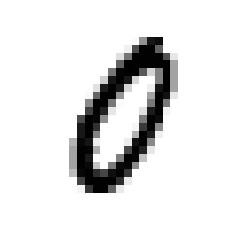

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Show a random input
#plot 7000 th image, first reshape it to 28 x 28
#in on hot encoding that digit position is one which is the digit shown
i = 3001
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

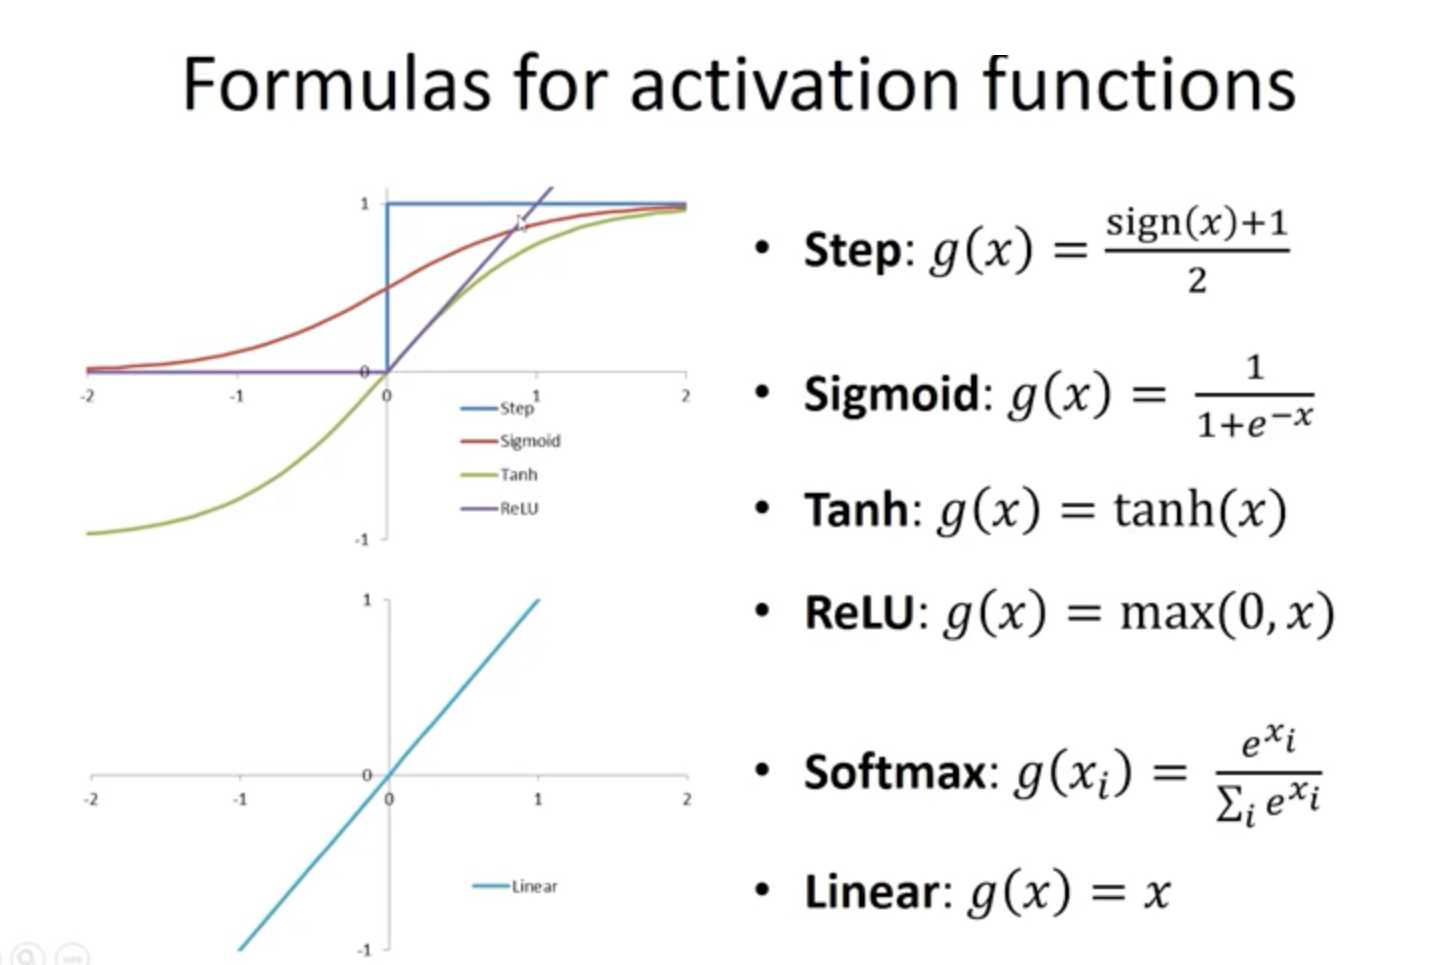

In [ ]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
#when z=0, derivative will be zero
#when z=1, derivative is zero
#it is maximum value=.25 ,when z=0.5, a bell curve formed
def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

# its derivative is zero below zero and one , above zero
#sign is -1 for less than zero and 1 for greater than zero
def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

#cross entropy loss used in multiclass classification
#derivative of cross entropy is -1/y_hat
def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L
#softmax is a generalisation of sigmoid over multiclass classification
def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

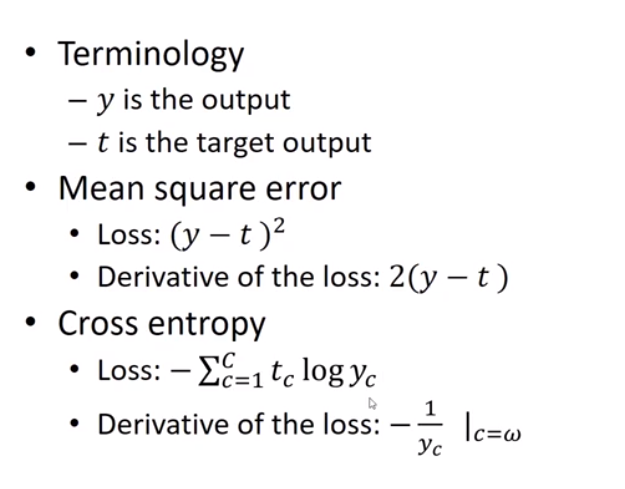

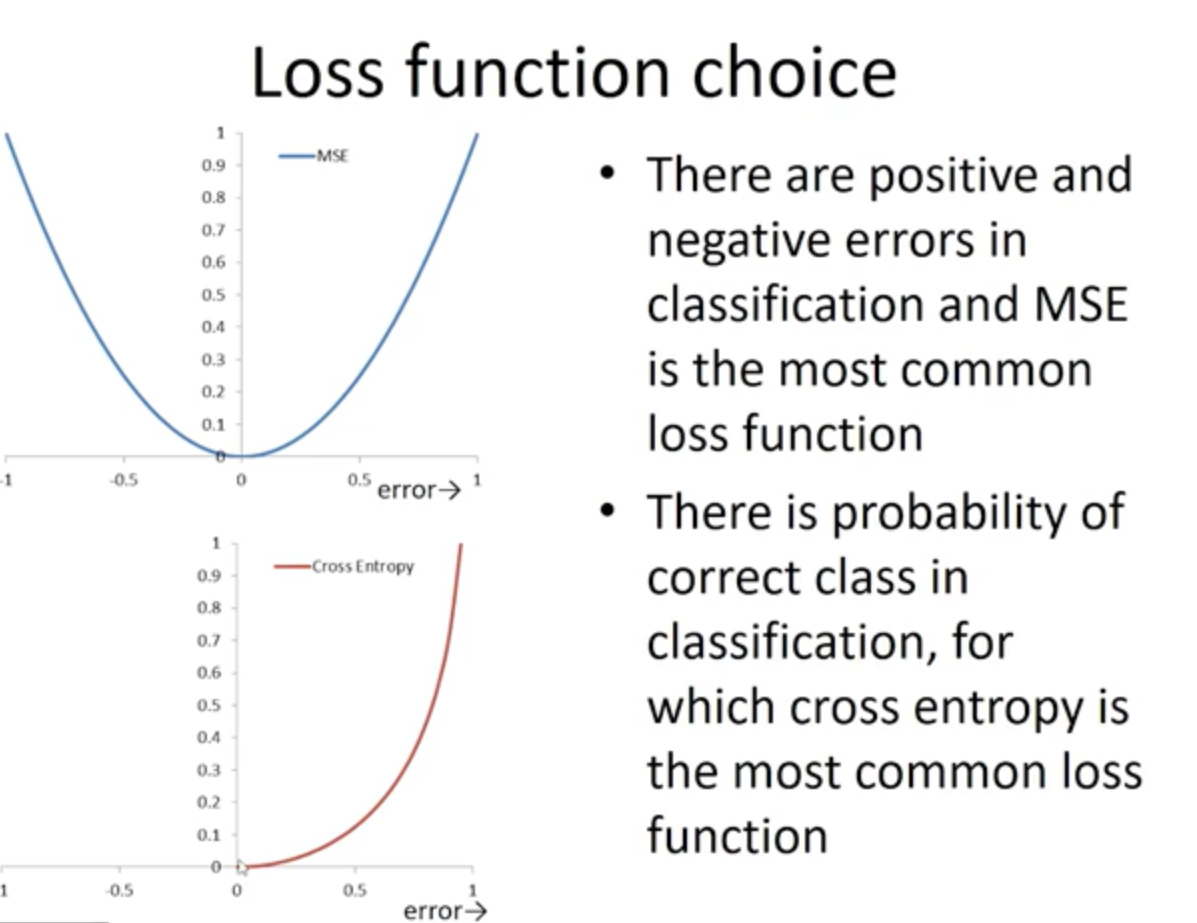

In [ ]:
#input dimension is same as we took the shape of I/p
#hidden layer has 64 nodes
#weight decay is regulalizer on L2 norm of the weights
inputDim = InputData_train.shape[1]
nHidden = 64
learning_rate = 1
# learning_rate = .1
weight_decay = 0.001
#W1 is weights from I/p to hidden layer
#w1 dimension: nhidden x inputDim
#we initialize using random gaussian variable multilplied by small no .01 since 
# we need both positive and negative weights therefore random initialisation
W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
#w2 dimension: nDigits X nhidden 
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))
# set the data for  neural network
inputData = InputData_train
y = y_train

Epoch 0 cost:  0.32989179214421893
Epoch 10 cost:  0.31234734926514013
Epoch 20 cost:  0.3103301803536028
Epoch 30 cost:  0.3091178510683654
Epoch 40 cost:  0.30821837582564154
Epoch 50 cost:  0.3075275713008466
Epoch 60 cost:  0.30701548216110375
Epoch 70 cost:  0.3066469461056688
Epoch 80 cost:  0.30639012624459744
Epoch 90 cost:  0.30623354731636976


<function matplotlib.pyplot.show>

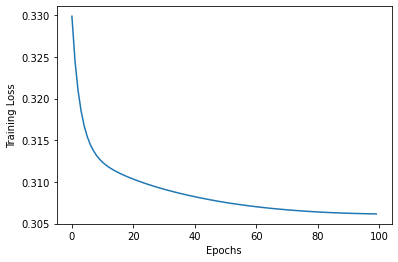

In [ ]:
#define for how many epochs to train the neural n/w
learning_rate = .1
nEpochs = 100
#define an empty array of cost for each epoch
costPlot = np.zeros(nEpochs)
# forward pass
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
#1/m for w1 and b1 because over m training examples
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
# weight decay is L2 normalization of weight decay
    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show



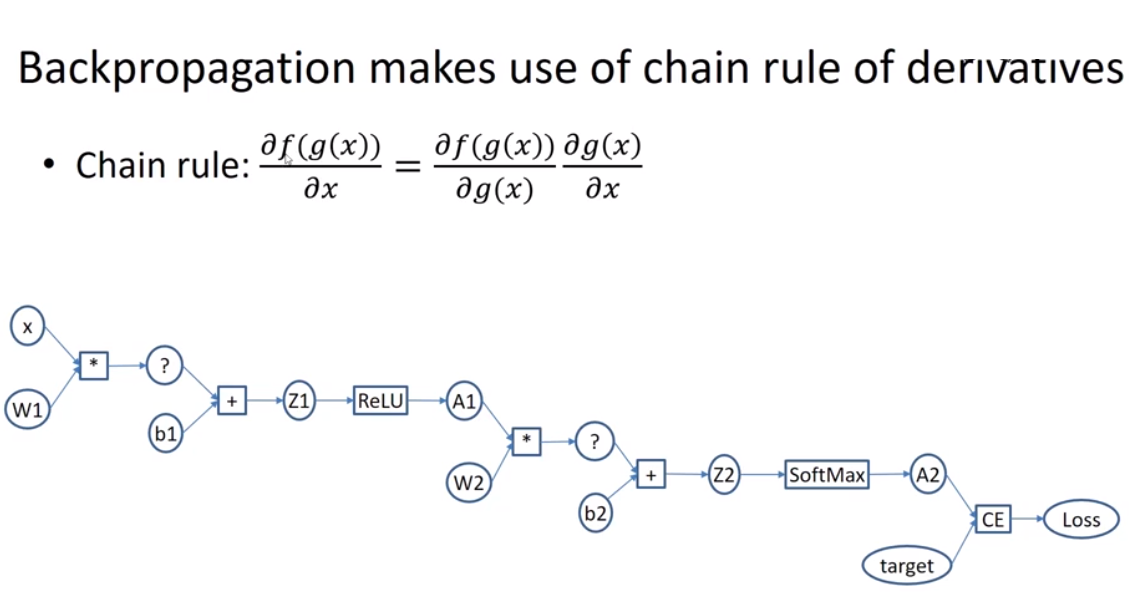

In [ ]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 939    0   37   12    0   76   34    9   19   13]
 [   0 1117   64   15   12   24    6   59   58   16]
 [   2    5  775   28    5   37   43   17   40    3]
 [   2    4   40  861    0  313    2    1  116   10]
 [   0    0   28    3  686   16   16   13   22  232]
 [  14    0    2    9    0  253    6    3   15    7]
 [  18    2   51    2   38   42  833    0   19    8]
 [   1    1   11   23    9   39    0  891   20  143]
 [   4    6   24   53   14   65   18   11  632   20]
 [   0    0    0    4  218   27    0   24   33  557]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1139
           1       0.98      0.81      0.89      1371
           2       0.75      0.81      0.78       955
           3       0.85      0.64      0.73      1349
           4       0.70      0.68      0.69      1016
           5       0.28      0.82      0.42       309
           6       0.87      0.82      0.85      1013
           7       0.87      0.78   